<a href="https://colab.research.google.com/github/antonychackotc/project-3/blob/main/part_5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA For Multiple Disease Prediction**

# **After filling missing values - Started EDA Process**

# **Missed Values Filled based on Skew Normal Distribution and Outlier take from each columns**

In [2]:
import pandas as pd

df1=pd.read_csv('/content/df1_cleaned.csv')
df2=pd.read_csv('/content/df2_cleaned.csv')
df3=pd.read_csv('/content/df3_cleaned.csv')

# **EDA - After finished of preprocessing (missing values)**

# **1) df1 is Indian Liver Patient**

# **2) df2 is Kidney Disease**

# **3) df3 is Parkinsons**

# **1) df1 - Indian Liver Patient**

In [3]:
df1.head()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df1['Dataset'].value_counts()

,count
Dataset,
1,416
2,167


1 is mean by Normal and

2 is mean by Abnormal

in Indian Liver Patient treatment result most of the peoples are normal

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

# **i) overall Normal and Abnormal**

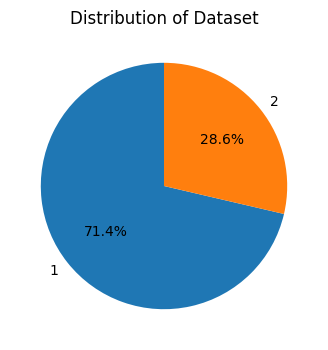

In [7]:

value_counts = df1['Dataset'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: to adjust the size of the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dataset')
plt.show()


**1 is mean by Normal as 71%**

**2 is mean by Abnormal as 28%**

**in Indian Liver Patient treatment result most of the peoples are normal**

In [8]:
############################################################################################################################

# **ii) Normal and Abnormal Based on Genders**

In [9]:
df1['Gender'].value_counts()

,count
Gender,
Male,441
Female,142


**In clinic Males Are Tested Result more compare to Female**

Gender distribution for Dataset 1:
Gender
Male      324
Female     92
Name: count, dtype: int64

Gender distribution for Dataset 2:
Gender
Male      117
Female     50
Name: count, dtype: int64


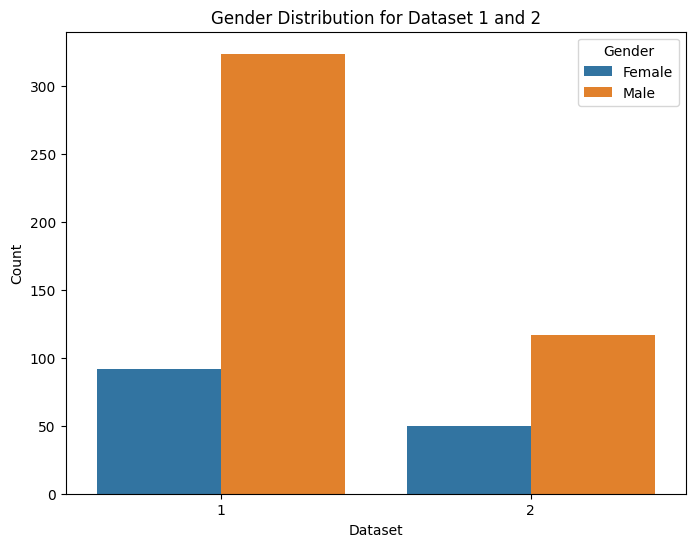

In [10]:


# Filter the DataFrame based on Dataset values (1 and 2)
result_1 = df1[df1['Dataset'] == 1]
result_2 = df1[df1['Dataset'] == 2]

# Display the count of each gender for result 1
print("Gender distribution for Dataset 1:")
print(result_1['Gender'].value_counts())

# Display the count of each gender for result 2
print("\nGender distribution for Dataset 2:")
print(result_2['Gender'].value_counts())

# Plotting the Gender distribution for Dataset 1 and 2
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Dataset', hue='Gender')
plt.title('Gender Distribution for Dataset 1 and 2')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


#**In Dataset 1 Total 324 Tested Result as Normal out of 441 Males and 92 females tested as Normal out of 142 Females**

#**In Dataset 2 Total 117 Males are Abnormal and 50 females as Abnormal**

In [13]:
# create age, gender and dataset based on which age mostily abnormal and normal then create a pie chart and sql

<ipython-input-19-ff8910f0adea>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df1.groupby(['age_group', 'Gender', 'Dataset']).size().unstack(fill_value=0).reset_index()
<ipython-input-19-ff8910f0adea>:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df1.pivot_table(index='age_group', columns='Gender', values='Dataset', aggfunc='mean')


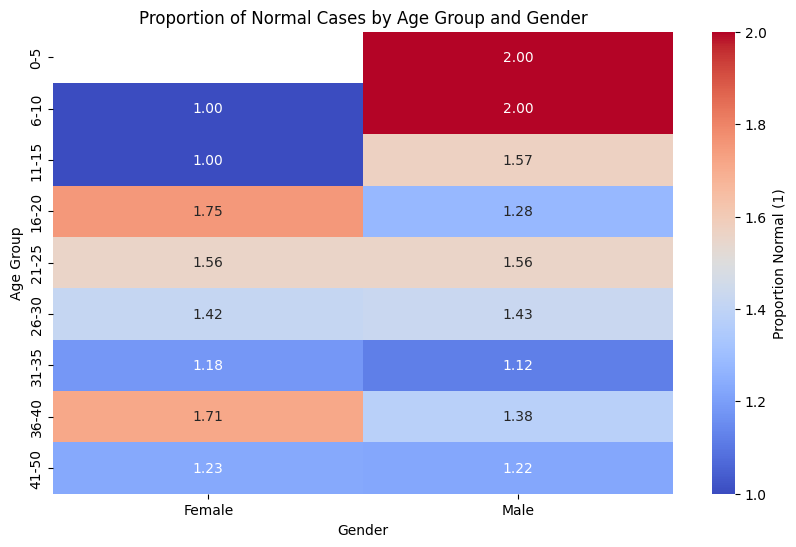

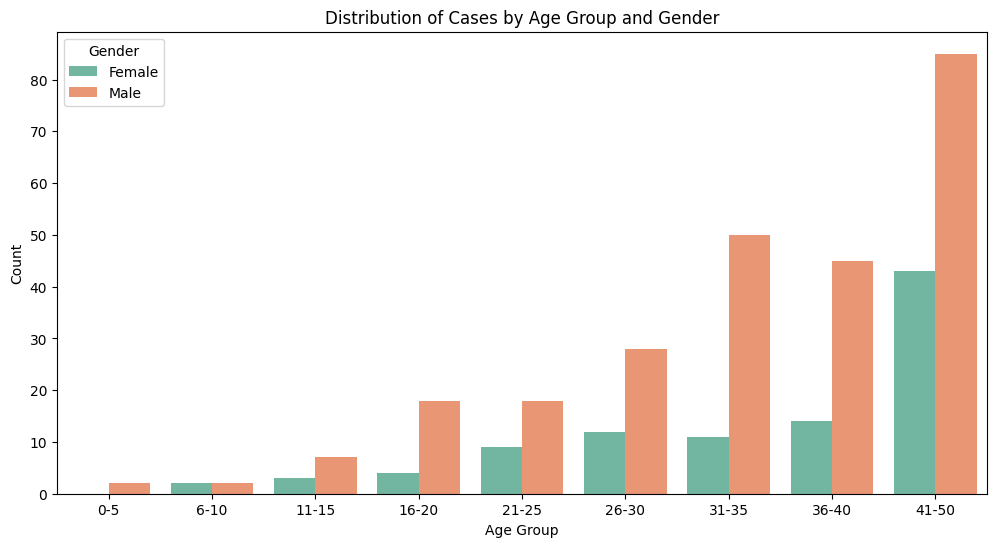

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create age groups
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-50']
df1['age_group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

# Group by age group and gender, and calculate the counts of normal and abnormal cases
summary = df1.groupby(['age_group', 'Gender', 'Dataset']).size().unstack(fill_value=0).reset_index()
summary.columns = ['age_group', 'gender', 'Abnormal', 'Normal']

# Visualization: Heatmap of abnormal/normal counts by age group and gender
heatmap_data = df1.pivot_table(index='age_group', columns='Gender', values='Dataset', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Proportion Normal (1)'})
plt.title('Proportion of Normal Cases by Age Group and Gender')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.show()

# Barplot for count distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='age_group', hue='Gender', palette='Set2')
plt.title('Distribution of Cases by Age Group and Gender')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.show()


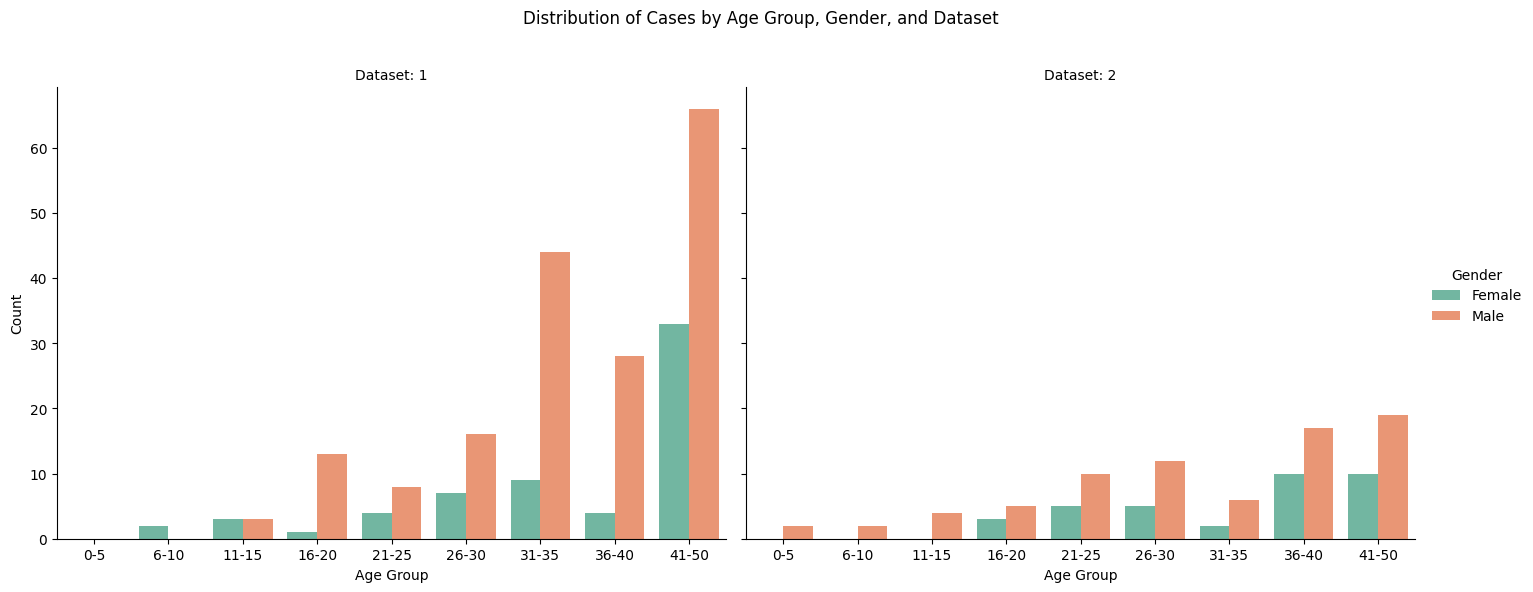

In [25]:
# Using a FacetGrid to separate countplots by Dataset
g = sns.catplot(
    data=df1,
    x="age_group",
    hue="Gender",
    col="Dataset",
    kind="count",
    palette="Set2",
    height=6,
    aspect=1.2,
    dodge=True
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Cases by Age Group, Gender, and Dataset')
g.set_axis_labels("Age Group", "Count")
g.set_titles("Dataset: {col_name}")
g.legend.set_title("Gender")

plt.show()


**in Deep analysing the data most of the male childs was affected in Dataset 2 mean by Abnormal,**

**0- 5 age children all children get result from abnormal and only male**

**6-10 age women children are get normal result but all male childrens get abnormal result**

**11 - 15 age childrens both male and females have equal normal results
but bost of male childrens get abnormal results**

# **Analysing Both Heatmap and Countplot - 0-15 age groups male childs especially below 10 years highly affected on Indian Liver Patients**

In [27]:
############################################################################################################################

# **2) df2 Kindney Disease**

In [28]:
df2.head()

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,...,44.0,44.0,5.2,yes,yes,no,good,no,no,ckd
1,1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,...,38.0,38.0,4.8,no,no,no,good,no,no,ckd
2,2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,...,31.0,31.0,4.8,no,yes,no,poor,no,yes,ckd
3,3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,...,32.0,32.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,...,35.0,35.0,4.6,no,no,no,good,no,no,ckd


# **i) CKD vs not CKD**

# **CKD - Chronic Kidney Disease**

In [31]:
df2['classification'].value_counts()

,count
classification,
ckd,250
notckd,150


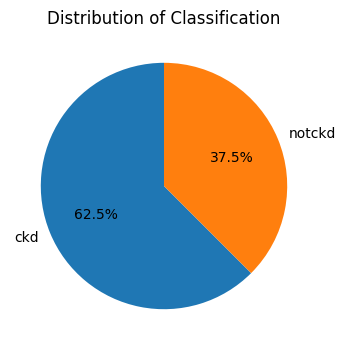

In [30]:

value_counts = df2['classification'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: to adjust the size of the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classification')
plt.show()


# **out of 400 Patients - 62% peoples affected ckd - chronic kidney disease and 37% peoples are not affected**

Age group distribution for Classification CKD:
age_group
61-70     77
51-60     60
41-50     36
71-80     35
31-40     14
0-10      10
11-20      7
81-100     6
21-30      5
Name: count, dtype: int64

Age group distribution for Classification notCKD:
age_group
41-50     35
51-60     31
31-40     29
61-70     19
21-30     18
71-80     12
11-20      4
81-100     2
0-10       0
Name: count, dtype: int64


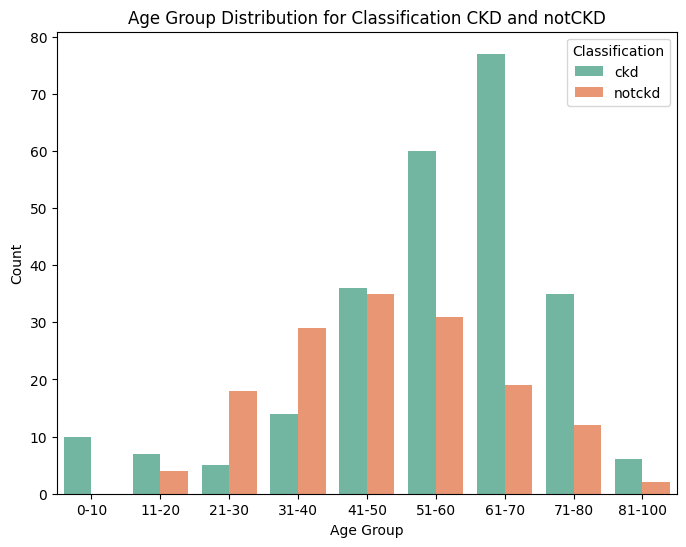

In [34]:
# Create age groups for df2['age']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]  # Define age group bins
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)

# Display the count of each age group for classification CKD
result_ckd = df2[df2['classification'] == 'ckd']
result_notckd = df2[df2['classification'] == 'notckd']

print("Age group distribution for Classification CKD:")
print(result_ckd['age_group'].value_counts())

print("\nAge group distribution for Classification notCKD:")
print(result_notckd['age_group'].value_counts())

# Plotting the age group distribution for CKD and notCKD
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='age_group', hue='classification', palette='Set2')
plt.title('Age Group Distribution for Classification CKD and notCKD')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Classification')
plt.show()


# **Comparing the dataset: Most of the age group is 61 to 70 age peoples are affect a ckd - chronic kidney disease and sadest news 0 to 5 age childres also mostly affected ckd**

<ipython-input-35-372a2f785c40>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df2.groupby(['classification', 'age_group'])[['bp', 'rc', 'wc']].mean().unstack()


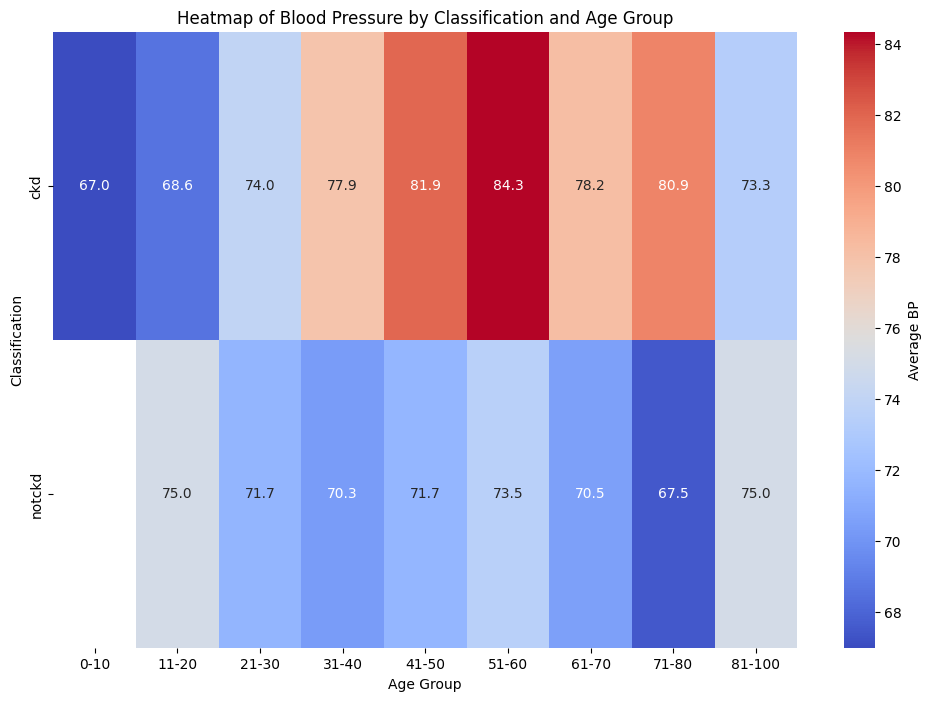

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age groups for df2['age']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]  # Define age group bins
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)

# Group by classification and age_group, calculate mean for bp, rc, and wc
heatmap_data = df2.groupby(['classification', 'age_group'])[['bp', 'rc', 'wc']].mean().unstack()

# Create a heatmap for blood pressure (bp) as an example
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data['bp'], annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average BP'})
plt.title('Heatmap of Blood Pressure by Classification and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Classification')
plt.show()

# Repeat for rc and wc if needed


# **This Heatmap clearly explianed as who have high blood pressure (bp) they are most propabaly affected as CKD (Chronic Kidney Disease)**

# **warning start from above 30 age groups 60 to 70 are strong ckd**

In [36]:
############################################################################################################################

# **3) df3 is Parkinsons**

In [37]:
df3.head()

,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [38]:
df3['status'].value_counts()

,count
status,
1,147
0,48


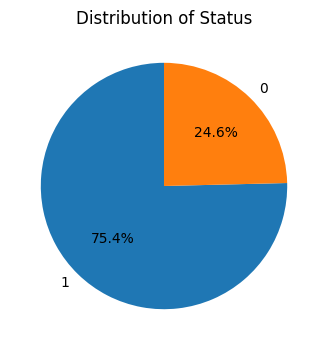

In [39]:

value_counts = df3['status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))  # Optional: to adjust the size of the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Status')
plt.show()


# **In df3 - Pakinsons disease total 195 patient tested - 75% patience got Normal and 25% got Abnormal Results**

# **ask to clint to get Sujection from Domain Knowlege person to select feature column select**

In [40]:
############################################################################################################################

# **In Medical Projects Most of the Client Does not like to treat outlier they ask to train data raw. if some emergency situation do outlier treatment as Custom fill option based on CLient Advices**

# **Missing Values also Filled by Client Advice based on Mean, Median and Custom fill**

# **in this Project Filled missing of each Columns based on Skewd and Normal Distribution result by mean and Median**